Kassel GeoJSON data saved to Kassel_geojson_data.geojson


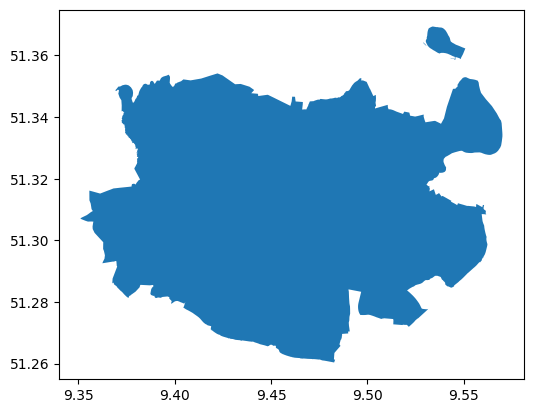

In [1]:
import osmnx as ox
import geojson
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape

def get_place_postal_code_polygons(place_name):
    query_tags = {"boundary": "postal_code"}
    postal_code_polygons = ox.features_from_place(place_name, tags=query_tags)
    df = pd.DataFrame(postal_code_polygons).dropna(subset=['postal_code', 'geometry', 'postal_code_level'])
    return {feature['postal_code']: feature['geometry'] for _, feature in df.iterrows()}

def format_geojson_data(data):
    return geojson.FeatureCollection([
        geojson.Feature(geometry=polygon, properties={"postal_code": postal_code})
        for postal_code, polygon in data.items()
    ])

def save_geojson_to_file(geojson_data, filename):
    with open(filename, 'w') as f:
        geojson.dump(geojson_data, f)

def plot_geojson_data(filename):
    gdf = gpd.read_file(filename)
    gdf.plot()
    plt.show()

# User input for the city or country name
place_input = input("Enter the city or country name: ")

# Use geocode_to_gdf to get the geometry for the specified place
geo_method = ox.geocode_to_gdf(place_input)

# Extract the geometry and create a GeoDataFrame
geometry = geo_method['geometry'].iloc[0]
geo_data = {place_input: geometry}
place_geojson_data = format_geojson_data(geo_data)

# Automatically create the filename in the same folder
file_name = f"{place_input}_geojson_data.geojson"

# Example call to save GeoJSON data to a file
save_geojson_to_file(place_geojson_data, file_name)

print(f"{place_input} GeoJSON data saved to {file_name}")

# Beispielaufruf der Plot-Funktion
plot_geojson_data(file_name)


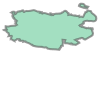

In [2]:
geometry

In [3]:
geo_data

{'Kassel': <MULTIPOLYGON (((9.351 51.307, 9.351 51.307, 9.352 51.307, 9.354 51.306, 9.3...>}